# RNA

## Librerias y Lectura Archivos

In [ ]:
# Librerías para manejo de datos
import numpy as np
import pandas as pd

# Librerías para preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Librerías para métricas y evaluación
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Librerías para visualización
import matplotlib.pyplot as plt

# Librerías para redes neuronales y optimización
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Librerías para ajuste de hiperparámetros
from keras_tuner.tuners import RandomSearch
import keras_tuner as kt

# Librerías estadísticas
from scipy.stats import pointbiserialr


In [2]:
#importacion df_final
df=pd.read_csv('../data/processed/v3_final_merge.csv')

In [3]:
df

,edad,sexo,nivel_educativo,fumador,actividad_fisica,vive,diabetes,hipertension,obesidad,cancer,...,region_Sur,tipo_empleo_Desempleado,tipo_empleo_Privado,tipo_empleo_Público,tipo_empleo_Temporal,continente_America,continente_Antarctica,continente_Asia,continente_Europe,continente_Oceania
0,69,0,1,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1,32,1,2,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,89,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,78,1,1,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0
4,38,0,3,1,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,1,2,0,2,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
49996,35,0,3,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
49997,46,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
49998,56,1,3,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [4]:
df.shape

(50000, 48)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edad                     50000 non-null  int64  
 1   sexo                     50000 non-null  int64  
 2   nivel_educativo          50000 non-null  int64  
 3   fumador                  50000 non-null  int64  
 4   actividad_fisica         50000 non-null  int64  
 5   vive                     50000 non-null  int64  
 6   diabetes                 50000 non-null  int64  
 7   hipertension             50000 non-null  int64  
 8   obesidad                 50000 non-null  int64  
 9   cancer                   50000 non-null  int64  
 10  enfermedad_cardiaca      50000 non-null  int64  
 11  epoc                     50000 non-null  int64  
 12  glucosa                  50000 non-null  float64
 13  colesterol               50000 non-null  float64
 14  trigliceridos         

## Análisis de Correlación

A continuación, vamos a estudiar la **correlación** de las variables con la clase objetivo que queremos predecir, es decir, si el paciente **vive o no**. Este análisis nos permitirá identificar qué variables tienen una relación más fuerte con la variable objetivo, lo que puede ser útil para seleccionar las características más relevantes para nuestra red neuronal.

In [12]:
X = df.drop(columns=['vive'])
y = df['vive']

# Calcular correlaciones
correlaciones = {}

for col in X.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        try:
            corr, _ = pointbiserialr(df[col], y)
            correlaciones[col] = corr
        except:
            correlaciones[col] = None
    else:
        correlaciones[col] = None

# Convertir a DataFrame
corr_df = pd.DataFrame.from_dict(correlaciones, orient='index', columns=['Correlación con vive'])

# Ordenar por valor absoluto
corr_df = corr_df.reindex(corr_df['Correlación con vive'].abs().sort_values(ascending=False).index)

corr_df

,Correlación con vive
cancer,-0.272906
gastos_salud,-0.262333
enfermedad_cardiaca,-0.242263
creatinina,-0.087198
epoc,-0.062929
hipertension,-0.060034
diabetes,-0.056181
leucocitos,-0.052074
fumador,-0.042654
glucosa,-0.035429


**Selección de Variables Significativas**

Para evitar introducir ruido en el modelo con datos poco significativos, inicialmente trabajaremos con las **15 variables más correlacionadas** con la variable objetivo (*vive*). Este enfoque nos ayudará a construir un modelo más eficiente y con mejor capacidad de generalización.


In [10]:
# Obtener los nombres de las 15 variables más correlacionadas
top_15_vars = corr_df.head(15).index.tolist()

# Crear nuevo DataFrame con esas variables y 'vive'
df_top15 = df[top_15_vars + ['vive']]

df_top15.head()

,cancer,gastos_salud,enfermedad_cardiaca,creatinina,epoc,hipertension,diabetes,leucocitos,fumador,glucosa,colesterol,edad,actividad_fisica,obesidad,ingresos_mensuales,vive
0,0,450,1,0.97,0,1,1,6.12,1,108.81,226.16,69,0,1,2699.72,1
1,0,150,0,0.85,0,0,0,6.97,0,74.23,148.89,32,1,0,3403.55,0
2,0,150,0,1.59,1,0,0,7.54,1,88.61,177.53,89,0,0,2422.41,1
3,1,450,1,1.26,0,0,1,8.56,1,90.92,203.97,78,0,1,1695.42,0
4,0,150,0,0.88,0,0,0,8.20,1,69.17,154.33,38,1,0,1709.51,1


In [8]:
df_top15.columns

Index(['cancer', 'gastos_salud', 'enfermedad_cardiaca', 'creatinina', 'epoc',
       'hipertension', 'diabetes', 'leucocitos', 'fumador', 'glucosa',
       'colesterol', 'edad', 'actividad_fisica', 'obesidad',
       'ingresos_mensuales', 'vive'],
      dtype='object')

## Estandarizar

In [ ]:
df_top15 = df[top_15_vars + ['vive']].copy()


vars_a_estandarizar = ['gastos_salud', 'creatinina', 'leucocitos', 'glucosa', 
                       'colesterol', 'edad', 'ingresos_mensuales']


scaler = StandardScaler()
df_top15[vars_a_estandarizar] = scaler.fit_transform(df_top15[vars_a_estandarizar])


df_top15

,cancer,gastos_salud,enfermedad_cardiaca,creatinina,epoc,hipertension,diabetes,leucocitos,fumador,glucosa,colesterol,edad,actividad_fisica,obesidad,ingresos_mensuales,vive
0,0,2.487493,1,-0.323535,0,1,1,-0.924342,1,1.125931,1.116180,0.750106,0,1,1.499543,1
1,0,-0.885562,0,-0.883740,0,0,0,-0.083060,0,-1.549388,-1.768373,-1.028843,1,0,2.557298,0
2,0,-0.885562,0,2.570857,1,0,0,0.481094,1,-0.436864,-0.699218,1.711700,0,0,1.082786,1
3,1,2.487493,1,1.030293,0,0,1,1.490633,1,-0.258148,0.287809,1.182823,0,1,-0.009775,0
4,0,-0.885562,0,-0.743689,0,0,0,1.134325,1,-1.940861,-1.565293,-0.740365,1,0,0.011400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,-0.885562,0,-0.556954,0,0,0,1.084838,0,0.452072,-0.436782,-1.557720,2,0,1.553781,1
49996,0,0.238790,1,-0.510270,0,0,0,-0.934239,0,-0.490247,-1.035569,-0.884604,1,0,0.406050,1
49997,0,-0.885562,0,0.283354,0,0,0,0.223761,0,-0.992353,-0.593572,-0.355727,1,0,-0.291335,1
49998,0,0.238790,0,0.843558,0,1,0,1.441146,1,-0.681341,-0.310231,0.125070,1,0,-1.130379,1


## Train y Test

In [14]:
X = df_top15.drop(columns=['vive'])
y = df_top15['vive']

# Separar en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Entrenaminento Red

Dado que la clase objetivo que queremos predecir está desbalanceada, utilizamos `class_weight` para asignar **mayor importancia a los errores cometidos en la clase minoritaria**. Esto ayua a la **red neuronal** a aprender de manera más **equilibrada** y mejorar su desempeño en la predicción de ambas clases.


In [17]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
my_class_weight = {0: weights[0], 1: weights[1]}
print(my_class_weight)

{0: np.float64(3.8963569062926164), 1: np.float64(0.5736082829036051)}


In [18]:
model = Sequential()

# Capa de entrada y primera capa intermedia
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Segunda capa intermedia
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Tercera capa intermedia
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=80,
                    batch_size=32,
                    class_weight=my_class_weight,
                    verbose=1)

# Evaluar el modelo
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

Epoch 1/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.6526 - loss: 0.6548 - precision_1: 0.9171 - recall_1: 0.6600 - val_accuracy: 0.7606 - val_loss: 0.5803 - val_precision_1: 0.9436 - val_recall_1: 0.7715
Epoch 2/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.7441 - loss: 0.6026 - precision_1: 0.9420 - recall_1: 0.7519 - val_accuracy: 0.7562 - val_loss: 0.5670 - val_precision_1: 0.9442 - val_recall_1: 0.7655
Epoch 3/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.7522 - loss: 0.5810 - precision_1: 0.9466 - recall_1: 0.7593 - val_accuracy: 0.7504 - val_loss: 0.5913 - val_precision_1: 0.9456 - val_recall_1: 0.7573
Epoch 4/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.7521 - loss: 0.5911 - precision_1: 0.9453 - recall_1: 0.7586 - val_accuracy: 0.7560 - val_loss: 0.5594 - val_precision_1: 0.9445 - val_recall_1: 0.7651
Epoch 5/80
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.7566 - loss: 0.5817 - precision_1: 0.9475 

### Matriz Confusión

In [21]:
# Generar predicciones
y_pred = (model.predict(X_test).ravel() > 0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


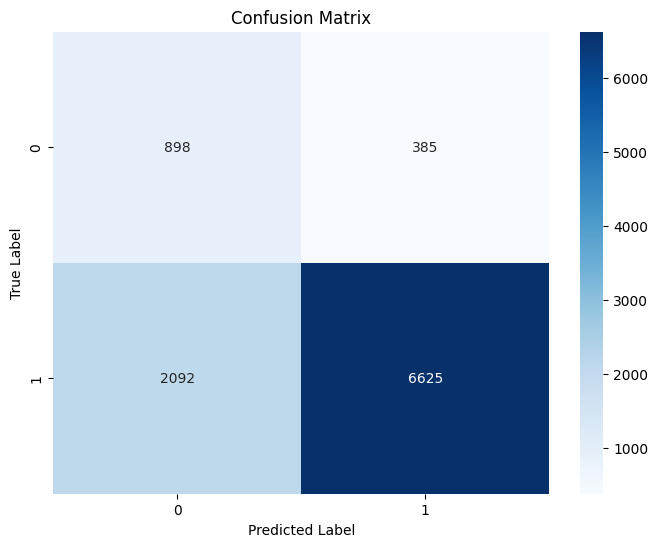

In [22]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Evalaución Modelo

In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.30      0.70      0.42      1283
           1       0.95      0.76      0.84      8717

    accuracy                           0.75     10000
   macro avg       0.62      0.73      0.63     10000
weighted avg       0.86      0.75      0.79     10000



# Tunner

In [27]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
my_class_weight = {0: weights[0], 1: weights[1]}  # ✅ usa otro nombre

In [28]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    model.add(Dense(hp.Int('units1', 32, 128, step=32),
                    activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.5, step=0.1)))

    model.add(Dense(hp.Int('units2', 16, 64, step=16),
                    activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dropout(hp.Float('dropout2', 0.2, 0.5, step=0.1)))

    model.add(Dense(hp.Int('units3', 8, 32, step=8),
                    activation='relu',
                    kernel_regularizer=l2(0.001)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=[
            BinaryAccuracy(name="accuracy"),
            Precision(name="precision"),
            Recall(name="recall")
        ]
    )
    return model

# --- Tuner personalizado para pasar class_weight ---
class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['class_weight'] =my_class_weight
        return super().run_trial(trial, *args, **kwargs)

# --- Callback de EarlyStopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# --- Tuner ---
tuner = MyTuner(
    build_model,
    objective='val_precision',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='tuning_dir',
    project_name='top15_precision_tuning'
)

# --- Búsqueda ---
tuner.search(X_train, y_train,
             validation_split=0.2,
             epochs=32,
             callbacks=[early_stop],
             verbose=1)

# --- Evaluación del mejor modelo ---
best_model = tuner.get_best_models(1)[0]
y_pred = (best_model.predict(X_test).ravel() > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Trial 10 Complete [00h 00m 18s]
val_precision: 0.9481030702590942

Best val_precision So Far: 0.9491555690765381
Total elapsed time: 00h 01m 31s
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step
[[ 920  363]
 [2179 6538]]
              precision    recall  f1-score   support

           0       0.30      0.72      0.42      1283
           1       0.95      0.75      0.84      8717

    accuracy                           0.75     10000
   macro avg       0.62      0.73      0.63     10000
weighted avg       0.86      0.75      0.78     10000



/Users/martinagarciagonzalez/Library/Python/3.12/lib/python/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
